In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score  
from sklearn.metrics import recall_score  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

## get the X_date, Y_target

In [55]:
def get_the_predicted_bugs(name, num1, num2):
    All_Data = pd.read_csv(name, usecols = [i for i in range(num1, num2)]).values
    return All_Data

In [56]:
data = get_the_predicted_bugs('modified_all_data.csv', 2, 45)

## RandomForestClassifier (best accuracy_score)

In [69]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
    rf_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', n_jobs = -1)
    rf_clf.fit(x_train, y_train)
    
    y_pre = rf_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))

In [70]:
np.mean(accuracy_score_list)

0.8686477462437395

In [71]:
np.mean(recall_score_list)

0.16418587690014935

By RandomForestClassifier, aftering tuning the parameters for getting the best accuracy_score, the average accuracy_score of 100 times is about is about 0.87 and the average recall_score of 100 times is about 0.16 with n_estimators = 200, criterion = 'entropy'.

## Feature selection

## Removing features with low variance

In [72]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    x_new = sel.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
    rf_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', n_jobs = -1)
    rf_clf.fit(x_train, y_train)    
    y_pre = rf_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))

In [73]:
np.mean(accuracy_score_list), np.mean(recall_score_list)

(0.8643071786310518, 0.14248092487242778)

In [75]:
x.shape, x_new.shape

((1497, 42), (1497, 35))

By Removing features with low variance, the average accuracy_score of 100 times is about 0.864, the result is not good enough.

## Univariate feature selection

In [76]:
def f(num_of_col, method):
    accuracy_score_list = []
    recall_score_list = []
    for i in range(100):
        data_random = np.random.permutation(data)
        x = data_random[:, [i for i in range(data.shape[1] - 1)]]
        y = data_random[:, -1]
        x_new = SelectKBest(method, k = num_of_col).fit_transform(x, y)
        x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
        
        rf_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', n_jobs = -1)
        rf_clf.fit(x_train, y_train) 

        y_pre = rf_clf.predict(x_test)
        accuracy_score_list.append(accuracy_score(y_test, y_pre))
        recall_score_list.append(recall_score(y_test, y_pre))
    average_accuracy_score = np.mean(accuracy_score_list)
    average_recall_score = np.mean(recall_score_list)
    return [average_accuracy_score, average_recall_score, x, x_new, x.shape, x_new.shape]

## f_classif

In [78]:
f(30, f_classif)

[0.8669449081803003,
 0.16155618044938042,
 array([[  1.,   0.,   0., ...,   2.,  13.,   3.],
        [  1.,   1.,   0., ...,   1.,   5.,   2.],
        [  1.,   1.,   0., ...,   1.,  27.,  10.],
        ...,
        [  1.,   1.,   0., ...,   7., 179.,  50.],
        [  1.,   1.,   0., ...,   2.,  18.,   8.],
        [  1.,   1.,   0., ...,   3.,  29.,  14.]]),
 array([[  1.,   0.,   0., ...,   0.,  13.,   3.],
        [  1.,   1.,   0., ...,   0.,   5.,   2.],
        [  1.,   1.,   0., ...,   1.,  27.,  10.],
        ...,
        [  1.,   1.,   0., ...,  11., 179.,  50.],
        [  1.,   1.,   0., ...,   0.,  18.,   8.],
        [  1.,   1.,   0., ...,   2.,  29.,  14.]]),
 (1497, 42),
 (1497, 30)]

Text(0.5,1,'accuracy_score - numbers of columns')

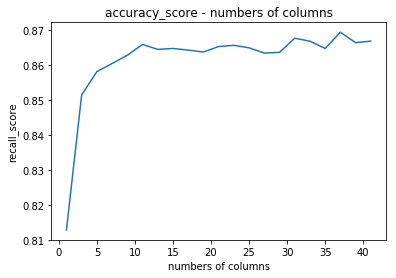

In [82]:
list_num = [i for i in range(1, 43, 2)]
list_recall_score =  [f(i, f_classif)[0] for i in range(1, 43, 2)]
plt.plot(list_num, list_recall_score)
plt.xlabel('numbers of columns')
plt.ylabel('recall_score')
plt.title('accuracy_score - numbers of columns')

By Univariate feature selection and f_classif, generally the average accuracy_score of 100 times increases with the increasement of the unmber of columns, which means the accuracy_score increases with the increasement of the number of columns we choose as our actual input. As a result, removing features by this method cannot increase the accuracy_score. 